In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 41 columns]

# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df.loc[df["koi_disposition"] != "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", "koi_prad", "koi_teq" ,"koi_insol", "koi_model_snr", "koi_tce_plnt_num", "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df.loc[df["koi_disposition"] != "CANDIDATE", "koi_disposition"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

In [6]:
X_train.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
979               0              1              1              1   41.077297   
6201              0              1              0              0   13.639480   
5648              0              1              0              0   14.854416   
229               0              0              0              0   10.681695   
1302              0              0              0              0   12.509458   

      koi_time0bk  koi_impact  koi_duration  koi_depth  koi_prad  koi_teq  \
979    379.128480       0.030       5.52500     1216.8      3.25      523   
6201   144.531439       1.033       3.12422    81103.0     44.00      680   
5648   136.559783       0.570       5.13753    77410.0     29.77      798   
229    131.550820       0.646       3.60500      307.8      2.30      897   
1302   136.992170       0.626       3.47900      155.3      1.54      875   

      koi_insol  koi_model_snr  koi_tce_plnt_num  koi_steff  koi_slogg  \
979       17.74           28.8                 1       5665      4.381   
6201      50.51          664.1                 1       5461      4.517   
5648      95.83         2822.1                 1       6214      4.444   
229      152.75           21.9                 4       5553      4.221   
1302     138.54           16.0                 2       5949      4.303   

      koi_srad         ra        dec  koi_kepmag  
979      0.938  289.07703  51.761822      14.907  
6201     0.846  292.21732  49.707901      15.852  
5648     1.022  282.42578  43.884331      14.558  
229      1.250  292.58044  46.097389      15.065  
1302     1.184  295.42200  38.735691      13.860

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC

model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

SVC(kernel='linear')

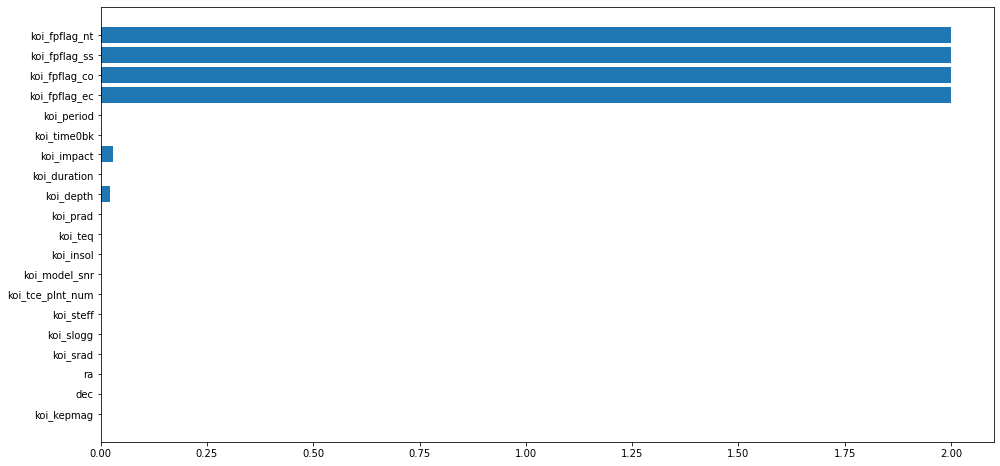

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.barh(X_train.columns, model2.coef_[0])
plt.xlim(0, max(model2.coef_[0])*1.05)
plt.gca().invert_yaxis()
plt.show()

In [50]:
# Set features again. This will also be used as your x values.
selected_features = df.loc[df["koi_disposition"] != "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_impact", "koi_depth"]]
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model2.fit(X_train_scaled, y_train)

SVC(kernel='linear')

# Train the Model



In [51]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.991955756661639
Testing Data Score: 0.9856711915535445


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [52]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [53]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.989, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.986, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.994, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.997, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.994, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.989, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=5, gamma=0.0001, score=0.994, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ................... C=5, gamma=0.0005, score=0.989, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ................... C=5, gamma=0.0005, score=0.986, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ................... C=5, gamma=0.0005, score=0.994, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ................... C=5, gamma=0.0005, score=0.997, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ................... C=5, gamma=0.0005, score=0.994, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.989, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [54]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'gamma': 0.0001}
0.991957586675516


In [55]:
predictions = grid2.predict(X_test_scaled)

In [56]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.96      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.99      0.99      1326



In [57]:
candidates = df.loc[df["koi_disposition"] == "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_impact", "koi_depth"]]
scaled_candidates = scaler.transform(candidates)
candidates["koi_disposition"] = grid2.predict(scaled_candidates)
candidates.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_impact  \
29              0              0              0              0       0.831   
47              0              0              0              0       0.911   
50              0              0              0              0       1.198   
51              0              0              0              0       0.624   
59              0              0              0              0       1.260   

    koi_depth koi_disposition  
29     9802.0       CONFIRMED  
47     6256.0       CONFIRMED  
50      556.4       CONFIRMED  
51       23.2       CONFIRMED  
59     1620.6       CONFIRMED

# Save the Model

In [58]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'joonil_kim_2.sav'
joblib.dump(grid2, filename)

['joonil_kim_2.sav']